In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [119]:
train.head()

id  Gender        Age    Height      Weight family_history_with_overweight   
0   0    Male  24.443011  1.699998   81.669950                            yes  \
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF   
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000  \
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [120]:
train.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

* FAVC - Frequent consumption of high caloric food
* FCVC - Frequency of consumption of vegetables
* NCP - number of main meals
* CAEC - Consumption of food between meals
* CH20 - Consumption of water daily
* SCC - Calories consumption monitoring
* FAF - Physical activity frequency
* TUE - Time using technology devices
* CALC - Consumption of alcohol
* MTRANS - Transportation used

In [121]:
# Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS
print(train.Gender.unique())
train.Gender = train.Gender.replace({'Male': 1.0, 'Female': 0.0})
print(train.Gender.unique())

['Male' 'Female']
[1. 0.]


In [122]:
print(train.family_history_with_overweight.unique())
train.family_history_with_overweight = train.family_history_with_overweight.replace({'yes': 1.0, 'no': 0.0})
print(train.family_history_with_overweight.unique())

['yes' 'no']
[1. 0.]


In [123]:
print(train.FAVC.unique())
train.FAVC = train.FAVC.replace({'yes': 1.0, 'no': 0.0})
print(train.FAVC.unique())

['yes' 'no']
[1. 0.]


In [124]:
print(train.SMOKE.unique())
train.SMOKE = train.SMOKE.replace({'yes': 1.0, 'no': 0.0})
print(train.SMOKE.unique())

['no' 'yes']
[0. 1.]


In [125]:
print(train.SCC.unique())
train.SCC = train.SCC.replace({'yes': 1.0, 'no': 0.0})
print(train.SCC.unique())

['no' 'yes']
[0. 1.]


In [126]:
# ordinal enconding
print(train.CAEC.unique())
print(train.CALC.unique()) 
print(train.NObeyesdad.unique())
# one hot enconding
print(train.MTRANS.unique())

['Sometimes' 'Frequently' 'no' 'Always']
['Sometimes' 'no' 'Frequently']
['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']
['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']


In [127]:
list(train.NObeyesdad.unique())

['Overweight_Level_II',
 'Normal_Weight',
 'Insufficient_Weight',
 'Obesity_Type_III',
 'Obesity_Type_II',
 'Overweight_Level_I',
 'Obesity_Type_I']

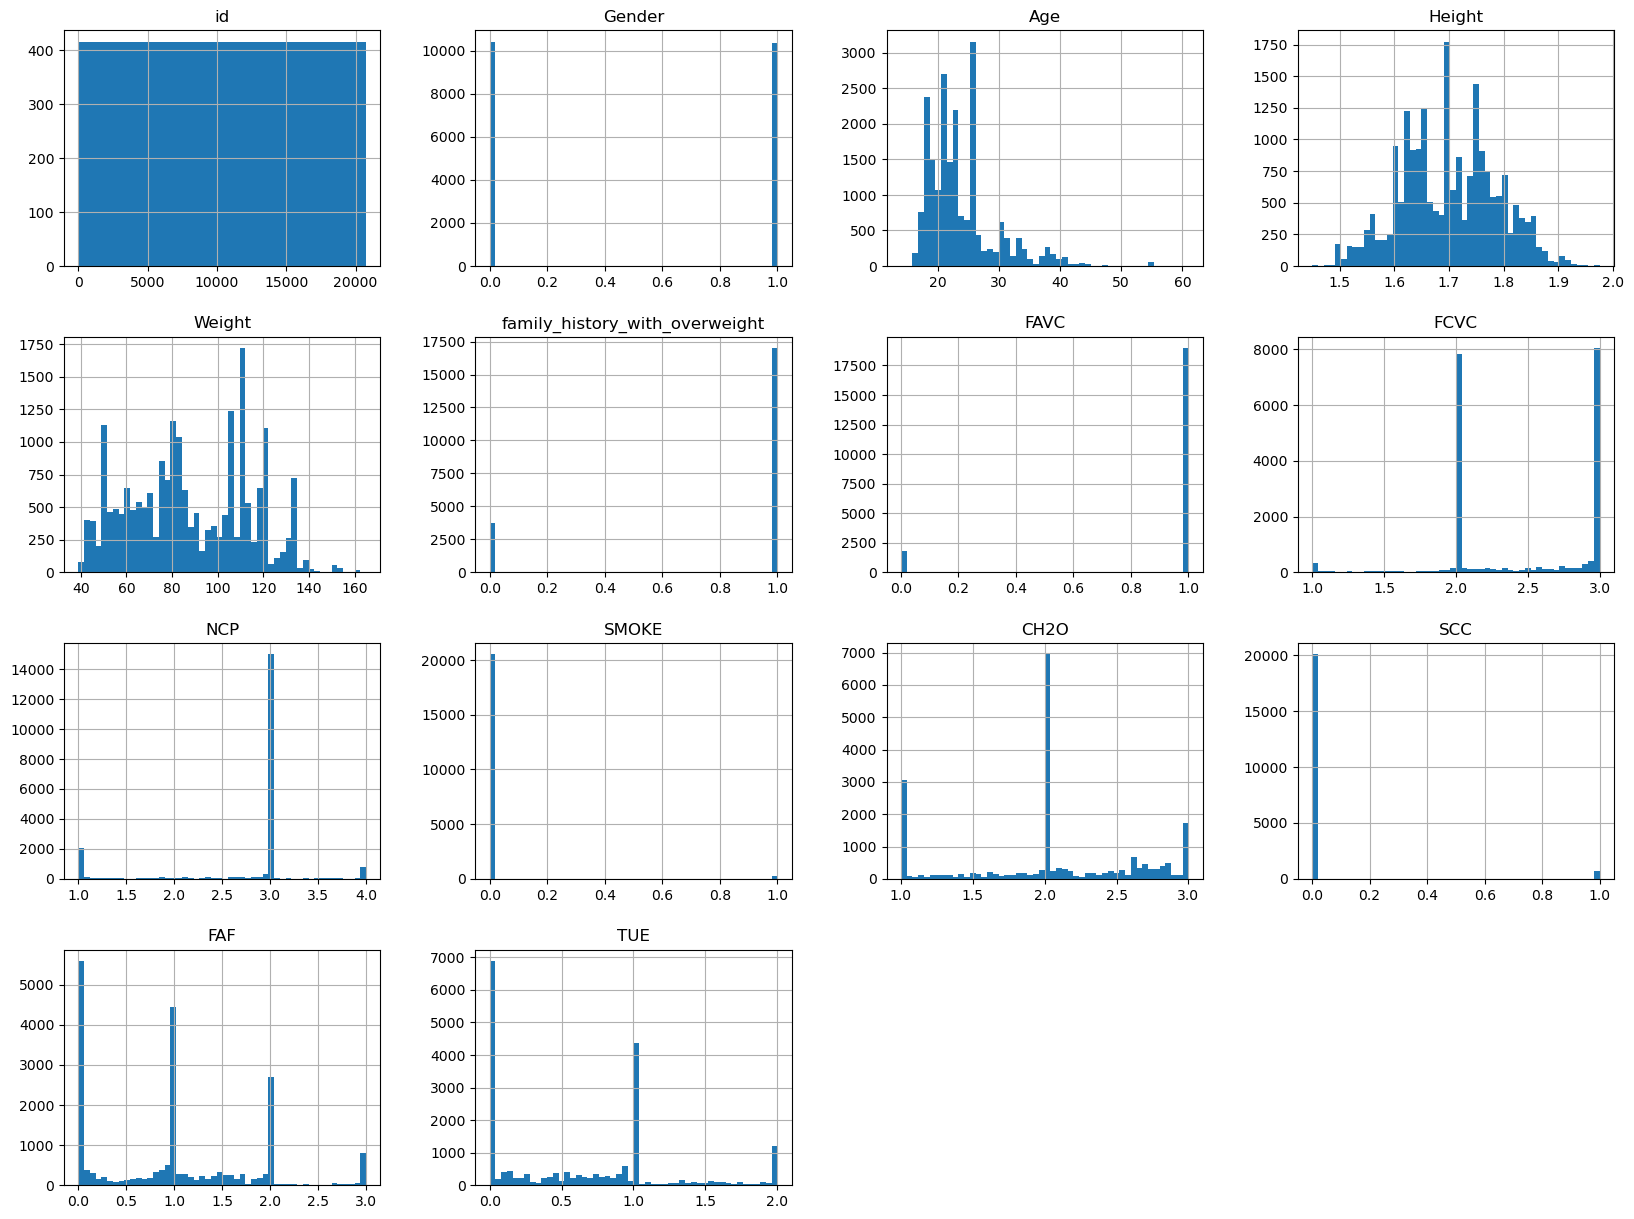

In [128]:
train.hist(bins=50, figsize=(20,15))
plt.show()

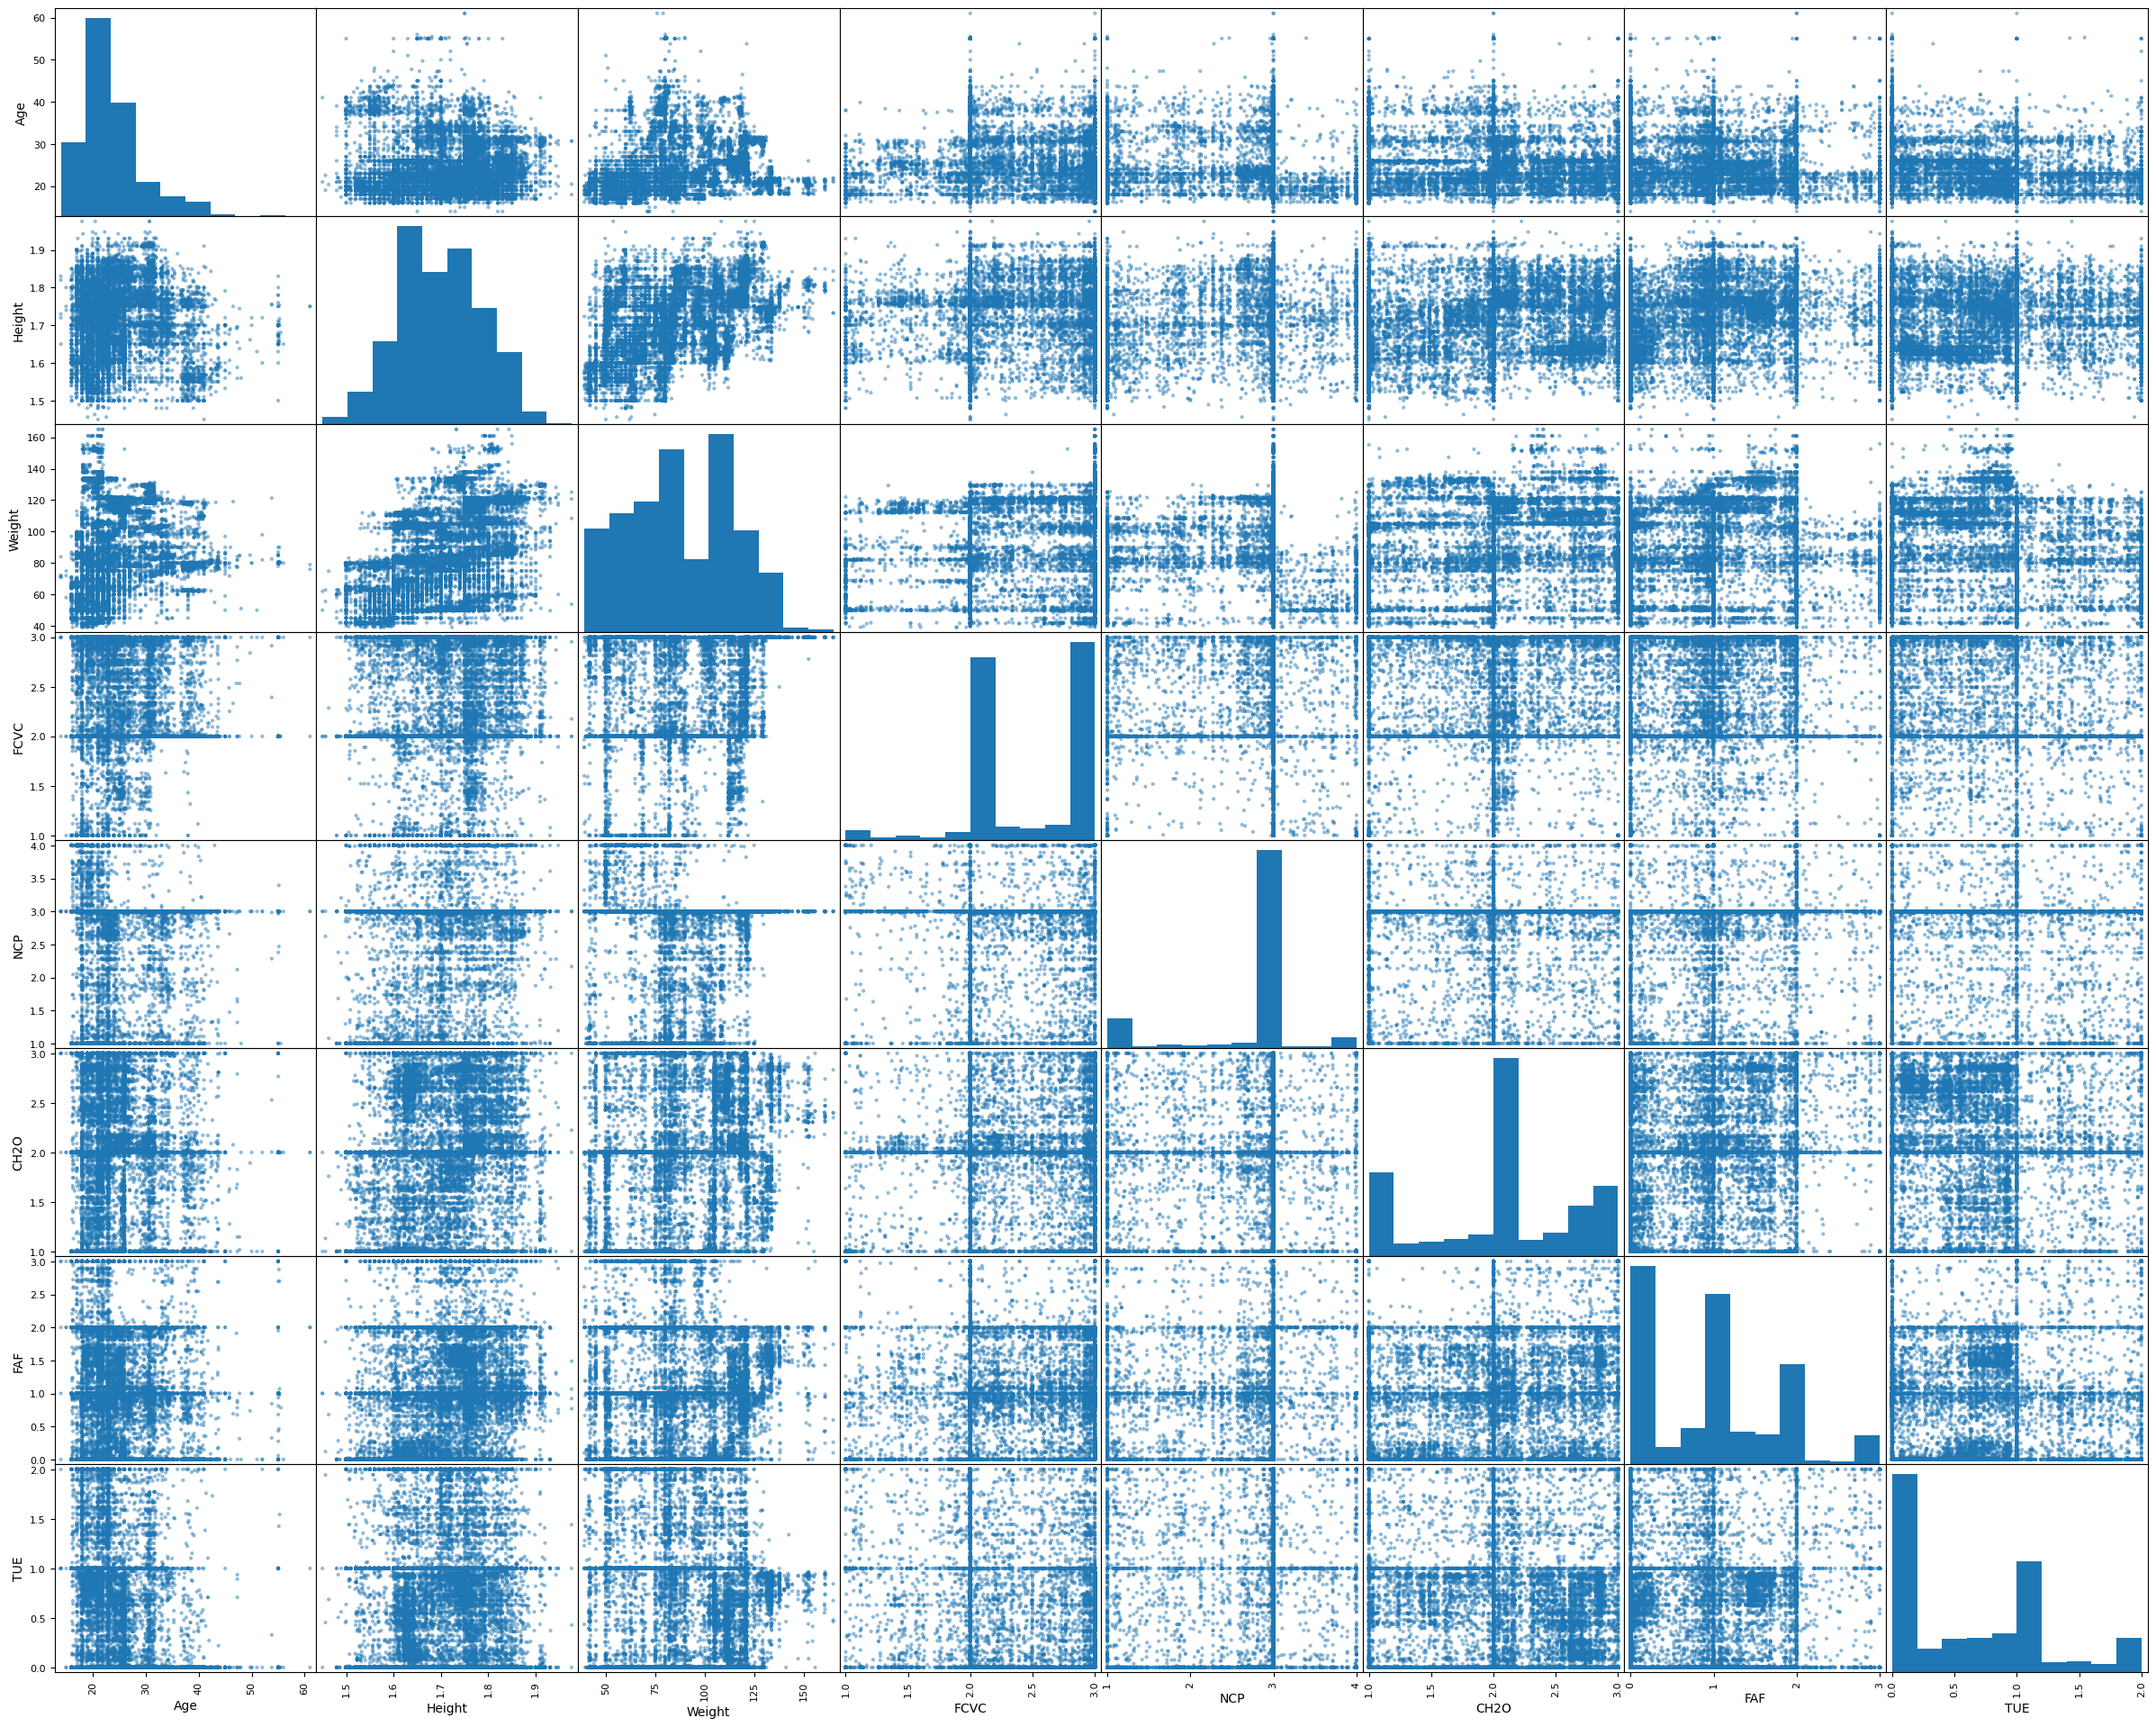

In [129]:
attributes = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
pd.plotting.scatter_matrix(train[attributes], figsize=(30,24))
plt.show()

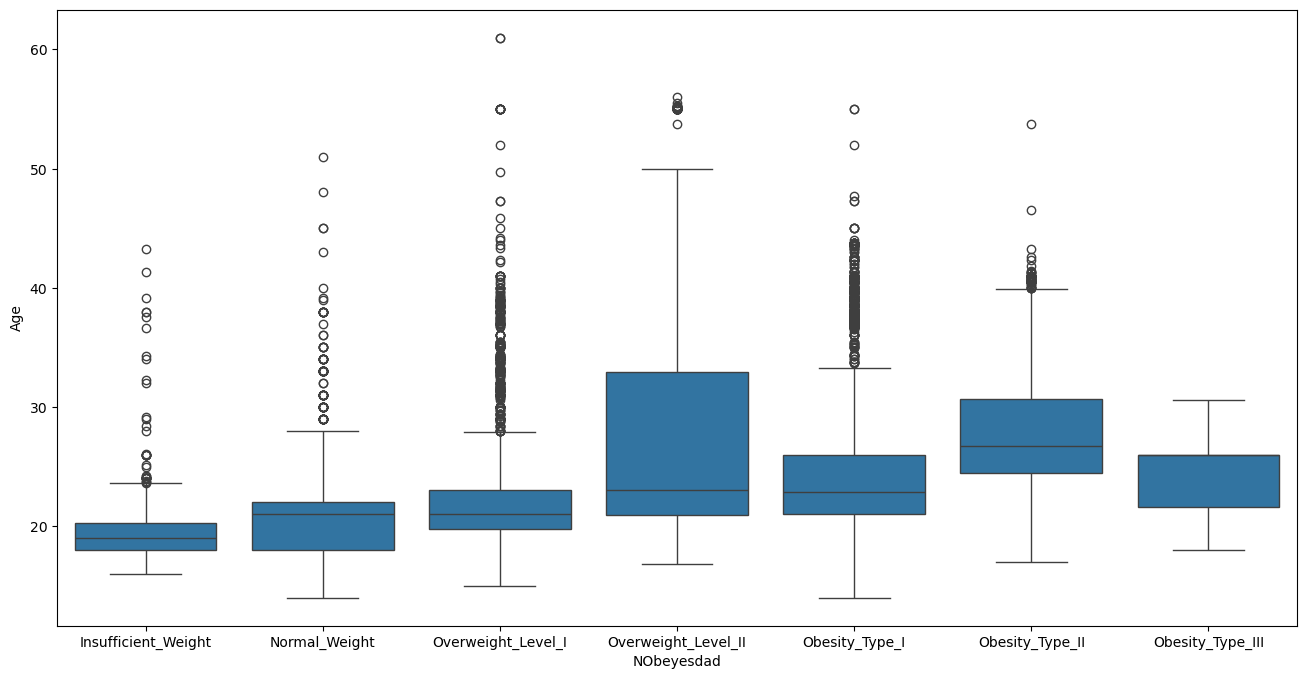

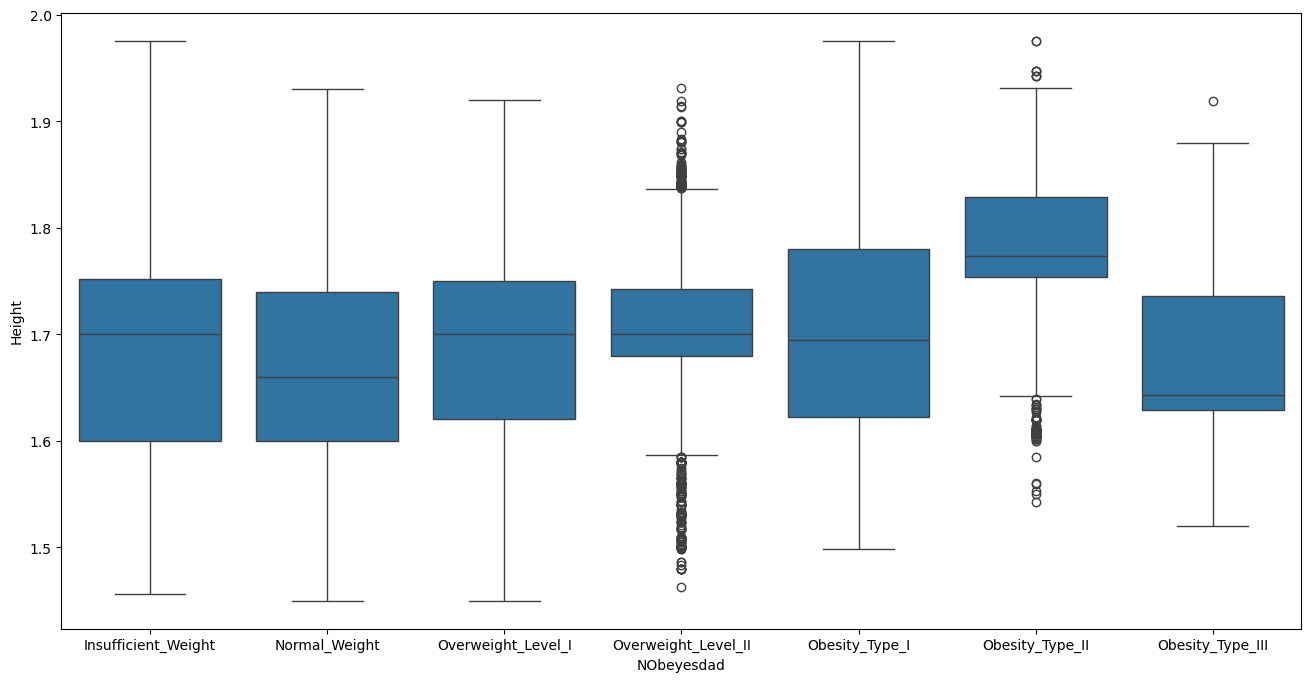

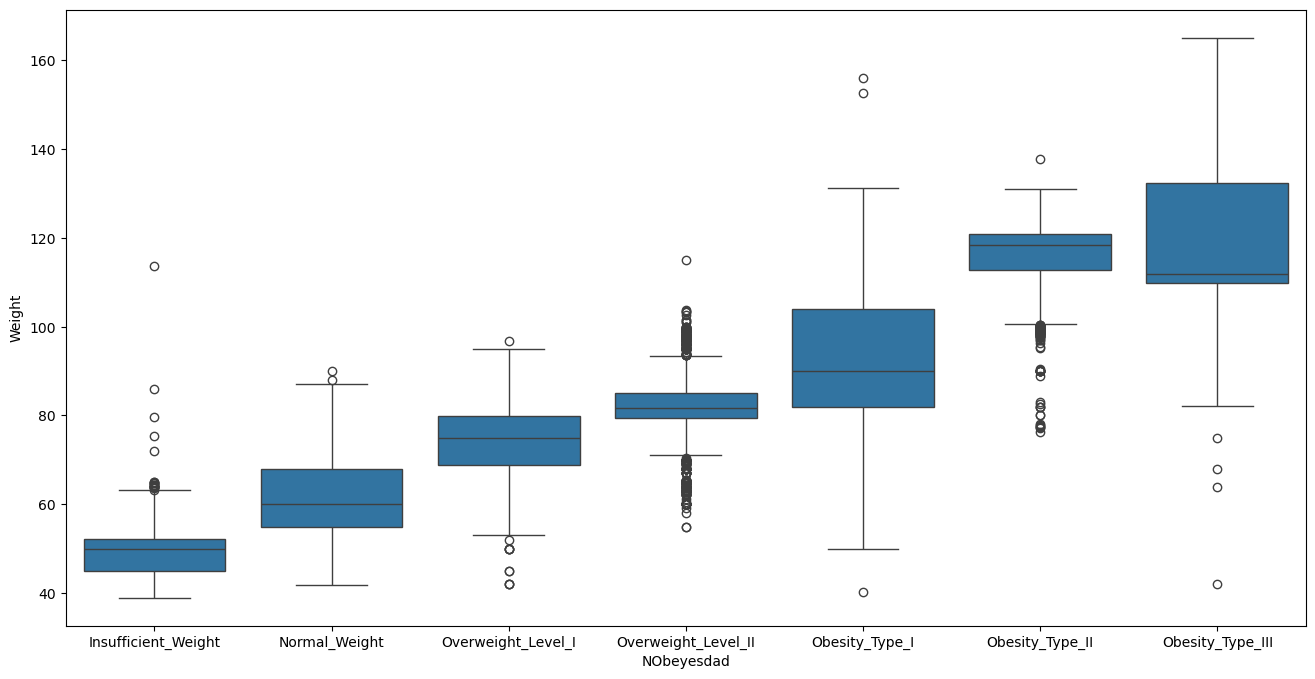

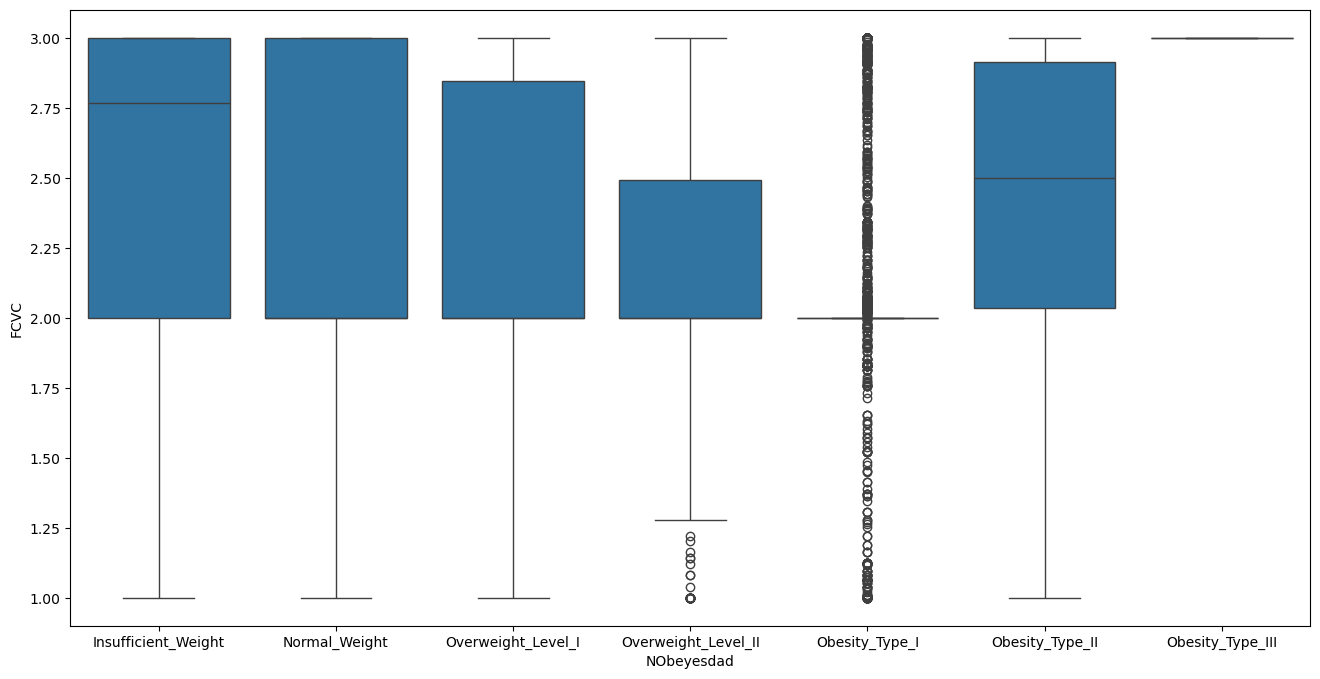

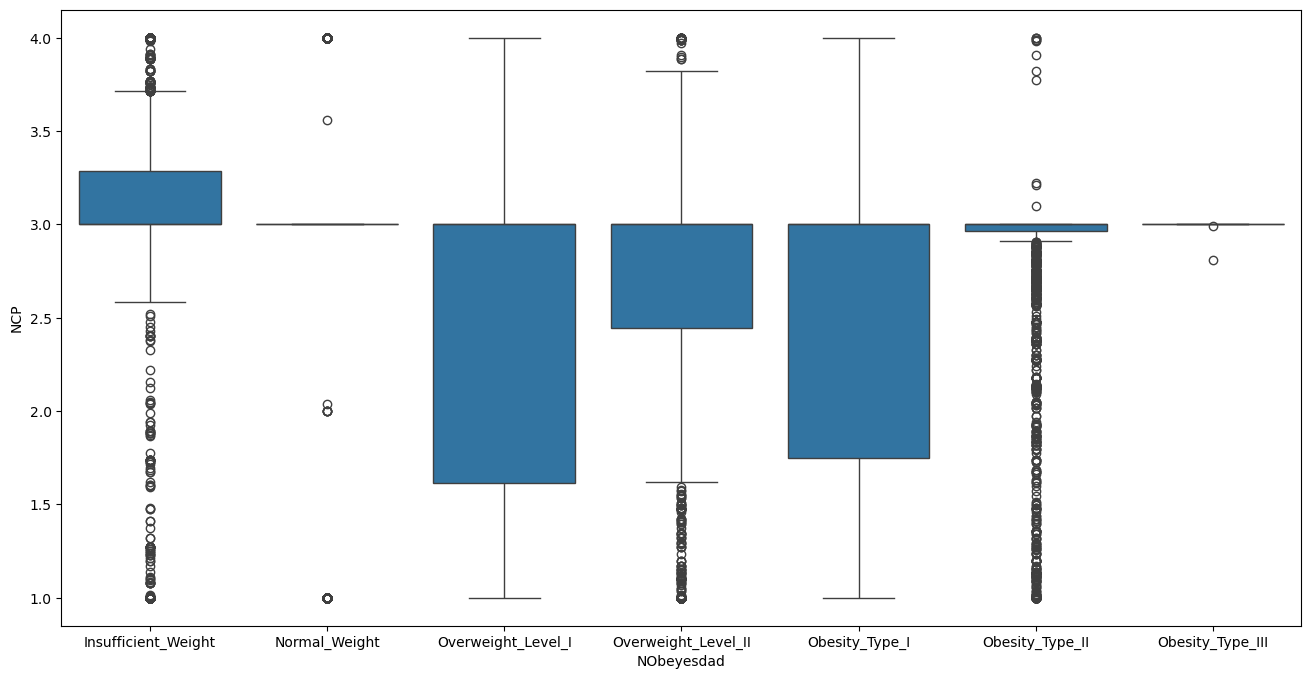

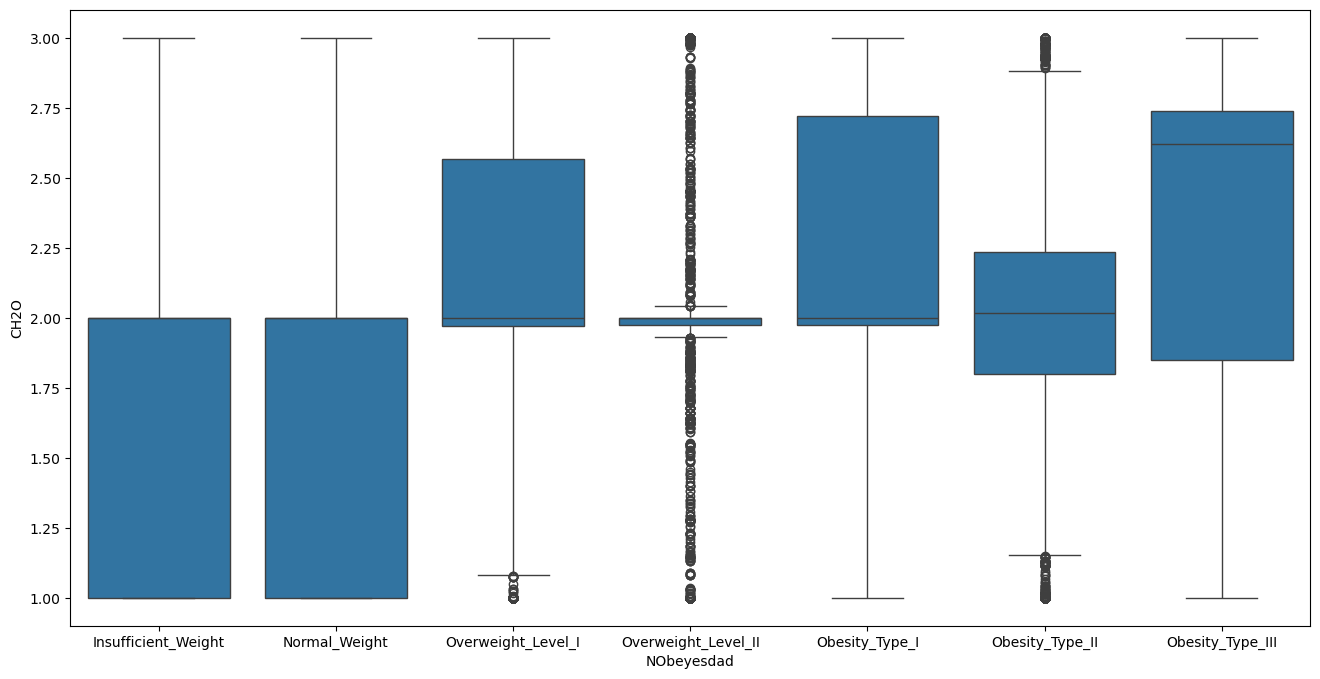

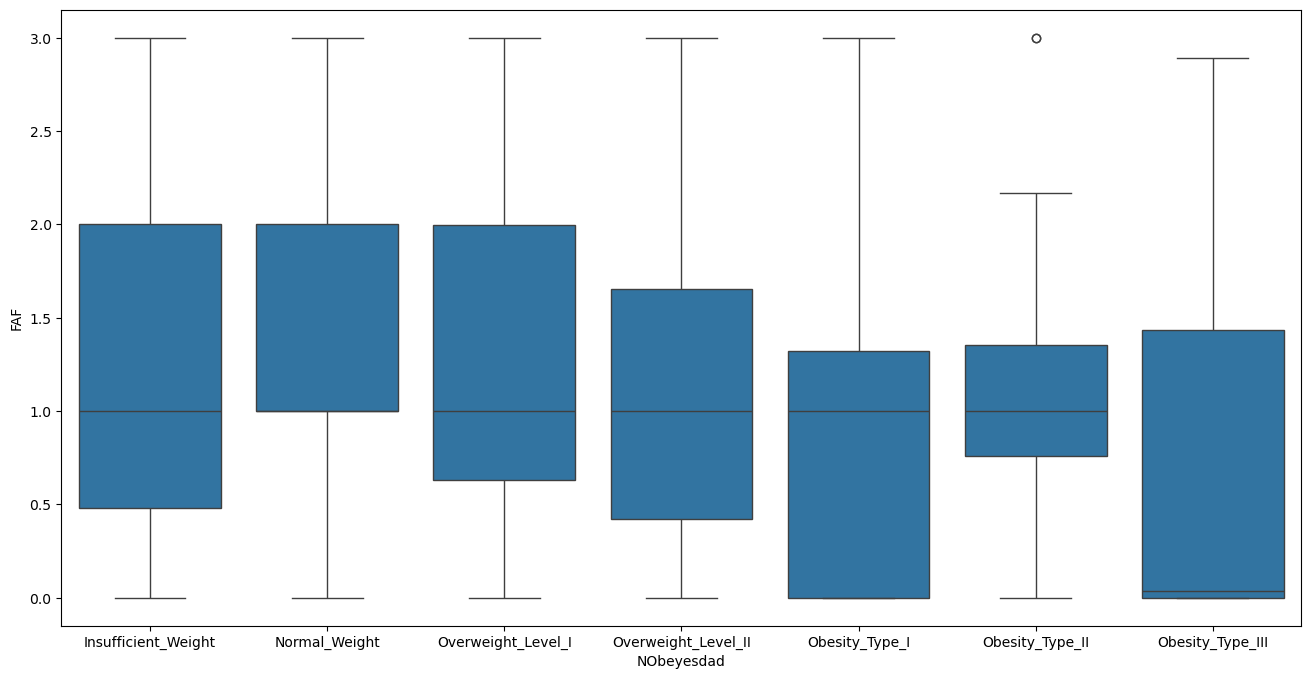

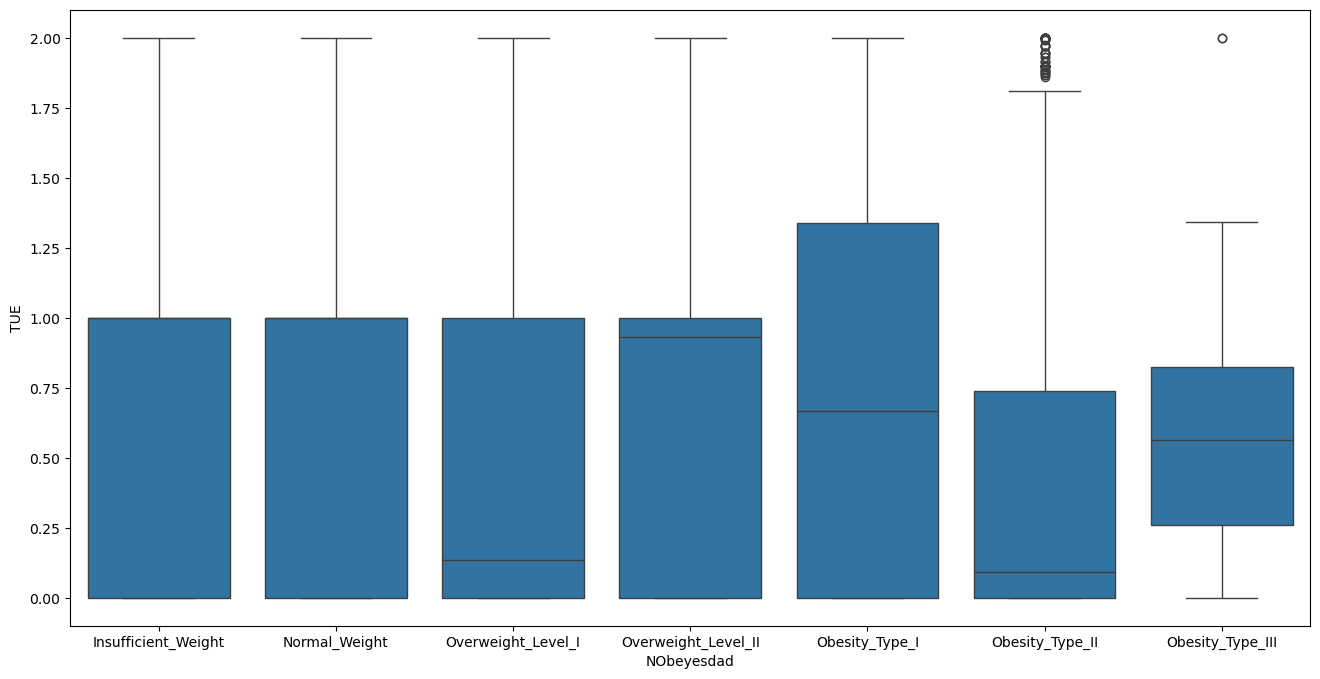

In [130]:
show_order = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
 ]

boxplot = [
    'Age',
    'Height',
    'Weight',
    'FCVC',
    'NCP',
    'CH2O',
    'FAF',
    'TUE',
]

for y in boxplot:
    plt.figure(figsize=(16, 8))
    sns.boxplot(train, x='NObeyesdad', y=y, orient='x', order=show_order)
    plt.show()

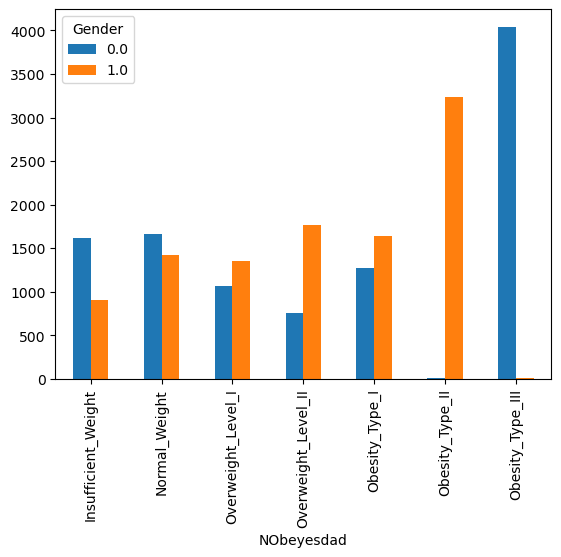

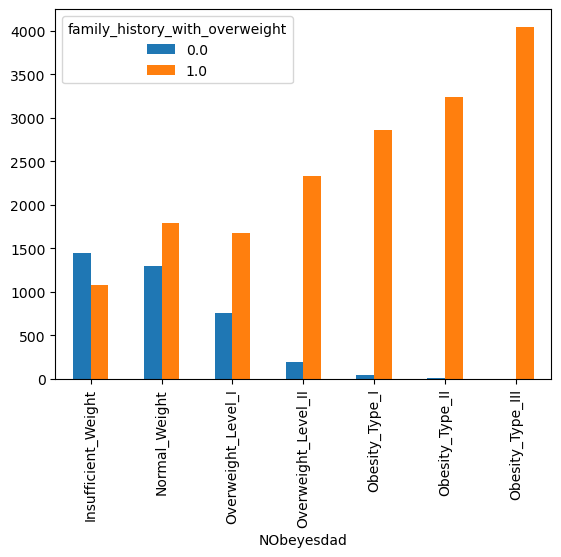

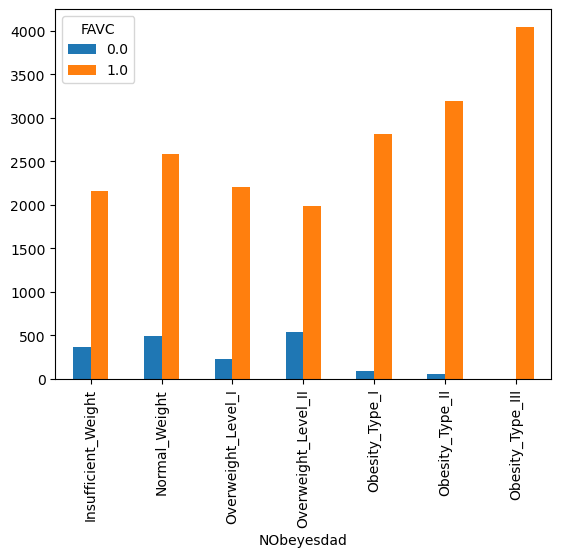

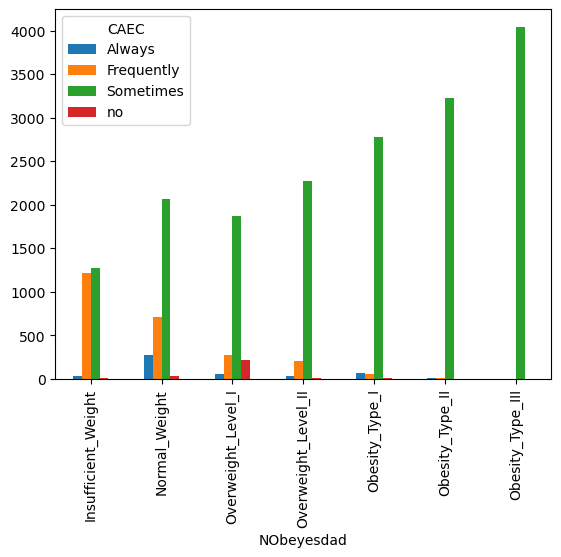

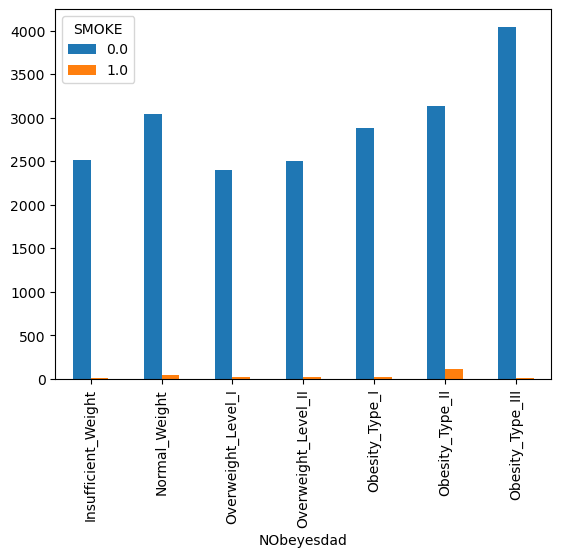

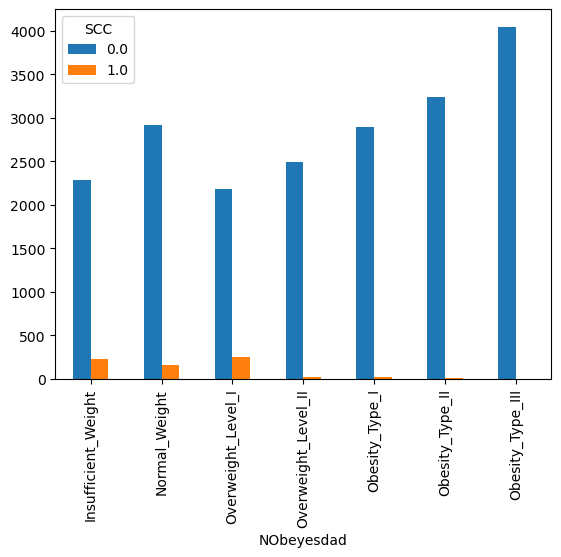

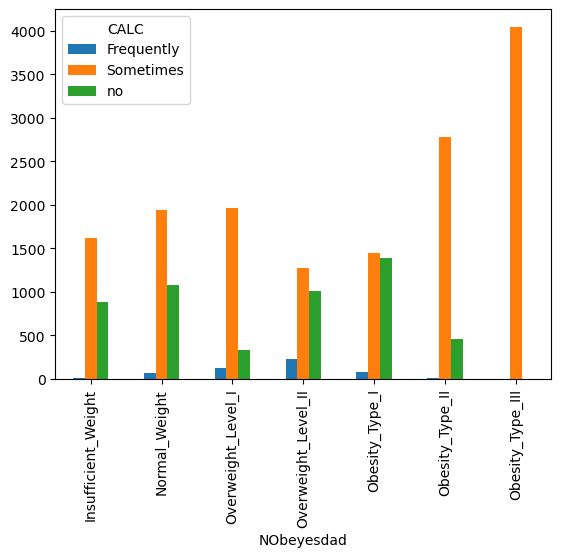

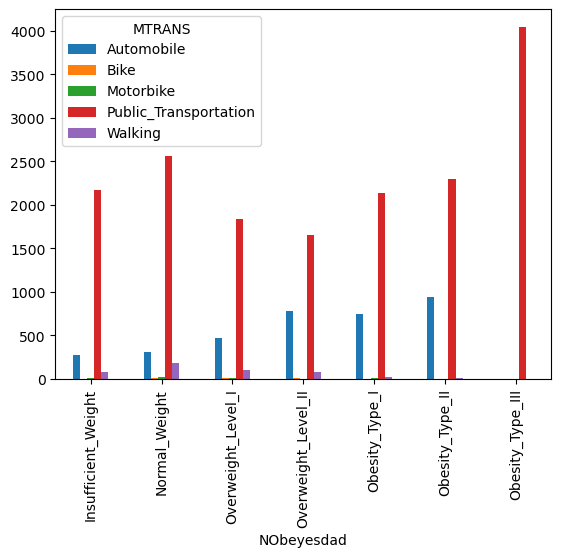

In [131]:
bar = [
    'Gender',
    'family_history_with_overweight',
    'FAVC',
    'CAEC',
    'SMOKE',
    'SCC',
    'CALC',
    'MTRANS',
]

for b in bar:
    df = train.groupby('NObeyesdad')[b].value_counts().unstack().reindex(show_order)
    df.plot(kind='bar')

Transform categorical attributes to number

* Ordinal Enconding -> Give a number for each category, eg: no=0, sometimes=1, ...
* One Hot Enconding -> Create a binary column for each category, indicating if the instance has that category

In [132]:
# Ordinal Enconding - CAEC, CALC, NObeyesdad
from sklearn.preprocessing import OrdinalEncoder

caec = ["no", "Sometimes", "Frequently", "Always"]
calc = ["no", "Sometimes", "Frequently", "Always"]
nobeyesdad = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]

train_cat = train[["CAEC", "CALC", "NObeyesdad"]]

In [133]:
cats = [caec, calc, nobeyesdad]
ordinal_encoder = OrdinalEncoder(categories=cats)
train_cat_encoded = ordinal_encoder.fit_transform(train_cat)
df_encoded = pd.DataFrame(train_cat_encoded, columns=["CAEC", "CALC", "NObeyesdad"])
df_encoded.head(10), train_cat.head(10)

(   CAEC  CALC  NObeyesdad
 0   1.0   1.0         3.0
 1   2.0   0.0         1.0
 2   1.0   0.0         0.0
 3   1.0   1.0         6.0
 4   1.0   1.0         3.0
 5   1.0   1.0         0.0
 6   1.0   1.0         5.0
 7   1.0   1.0         5.0
 8   1.0   0.0         2.0
 9   1.0   1.0         6.0,
          CAEC       CALC           NObeyesdad
 0   Sometimes  Sometimes  Overweight_Level_II
 1  Frequently         no        Normal_Weight
 2   Sometimes         no  Insufficient_Weight
 3   Sometimes  Sometimes     Obesity_Type_III
 4   Sometimes  Sometimes  Overweight_Level_II
 5   Sometimes  Sometimes  Insufficient_Weight
 6   Sometimes  Sometimes      Obesity_Type_II
 7   Sometimes  Sometimes      Obesity_Type_II
 8   Sometimes         no   Overweight_Level_I
 9   Sometimes  Sometimes     Obesity_Type_III)

In [134]:
train["CAEC"] = df_encoded["CAEC"]
train["CALC"] = df_encoded["CALC"]
train["NObeyesdad"] = df_encoded["NObeyesdad"]
train.head(10)

id  Gender        Age    Height      Weight   
0   0     1.0  24.443011  1.699998   81.669950  \
1   1     0.0  18.000000  1.560000   57.000000   
2   2     0.0  18.000000  1.711460   50.165754   
3   3     0.0  20.952737  1.710730  131.274851   
4   4     1.0  31.641081  1.914186   93.798055   
5   5     1.0  18.128249  1.748524   51.552595   
6   6     1.0  29.883021  1.754711  112.725005   
7   7     1.0  29.891473  1.750150  118.206565   
8   8     1.0  17.000000  1.700000   70.000000   
9   9     0.0  26.000000  1.638836  111.275646   

   family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE   
0                             1.0   1.0  2.000000  2.983297   1.0    0.0  \
1                             1.0   1.0  2.000000  3.000000   2.0    0.0   
2                             1.0   1.0  1.880534  1.411685   1.0    0.0   
3                             1.0   1.0  3.000000  3.000000   1.0    0.0   
4                             1.0   1.0  2.679664  1.971472   1.0    0.0   
5                             1.0   1.0  2.919751  3.000000   1.0    0.0   
6                             1.0   1.0  1.991240  3.000000   1.0    0.0   
7                             1.0   1.0  1.397468  3.000000   1.0    0.0   
8                             0.0   1.0  2.000000  3.000000   1.0    0.0   
9                             1.0   1.0  3.000000  3.000000   1.0    0.0   

       CH2O  SCC       FAF       TUE  CALC                 MTRANS  NObeyesdad  
0  2.763573  0.0  0.000000  0.976473   1.0  Public_Transportation         3.0  
1  2.000000  0.0  1.000000  1.000000   0.0             Automobile         1.0  
2  1.910378  0.0  0.866045  1.673584   0.0  Public_Transportation         0.0  
3  1.674061  0.0  1.467863  0.780199   1.0  Public_Transportation         6.0  
4  1.979848  0.0  1.967973  0.931721   1.0  Public_Transportation         3.0  
5  2.137550  0.0  1.930033  1.000000   1.0  Public_Transportation         0.0  
6  2.000000  0.0  0.000000  0.696948   1.0             Automobile         5.0  
7  2.000000  0.0  0.598655  0.000000   1.0             Automobile         5.0  
8  3.000000  1.0  1.000000  1.000000   0.0  Public_Transportation         2.0  
9  2.632253  0.0  0.000000  0.218645   1.0  Public_Transportation         6.0

In [135]:
# One Hot Enconding
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()
train_1hot = one_hot.fit_transform(train[["MTRANS"]]) # return sparse matrix
train_1hot.toarray()[:5], train["MTRANS"].head()

(array([[0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.]]),
 0    Public_Transportation
 1               Automobile
 2    Public_Transportation
 3    Public_Transportation
 4    Public_Transportation
 Name: MTRANS, dtype: object)

In [136]:
columns = one_hot.get_feature_names_out()
print(columns)
train.drop(columns=["MTRANS"], inplace=True)
train = pd.concat([train, pd.DataFrame.sparse.from_spmatrix(train_1hot, columns=columns)], axis=1)
train.head(5)

['MTRANS_Automobile' 'MTRANS_Bike' 'MTRANS_Motorbike'
 'MTRANS_Public_Transportation' 'MTRANS_Walking']


id  Gender        Age    Height      Weight   
0   0     1.0  24.443011  1.699998   81.669950  \
1   1     0.0  18.000000  1.560000   57.000000   
2   2     0.0  18.000000  1.711460   50.165754   
3   3     0.0  20.952737  1.710730  131.274851   
4   4     1.0  31.641081  1.914186   93.798055   

   family_history_with_overweight  FAVC      FCVC       NCP  CAEC  ...  SCC   
0                             1.0   1.0  2.000000  2.983297   1.0  ...  0.0  \
1                             1.0   1.0  2.000000  3.000000   2.0  ...  0.0   
2                             1.0   1.0  1.880534  1.411685   1.0  ...  0.0   
3                             1.0   1.0  3.000000  3.000000   1.0  ...  0.0   
4                             1.0   1.0  2.679664  1.971472   1.0  ...  0.0   

        FAF       TUE  CALC  NObeyesdad  MTRANS_Automobile  MTRANS_Bike   
0  0.000000  0.976473   1.0         3.0                0.0          0.0  \
1  1.000000  1.000000   0.0         1.0                1.0          0.0   
2  0.866045  1.673584   0.0         0.0                0.0          0.0   
3  1.467863  0.780199   1.0         6.0                0.0          0.0   
4  1.967973  0.931721   1.0         3.0                0.0          0.0   

   MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0               0.0                           1.0             0.0  
1               0.0                           0.0             0.0  
2               0.0                           1.0             0.0  
3               0.0                           1.0             0.0  
4               0.0                           1.0             0.0  

[5 rows x 22 columns]

<Axes: >

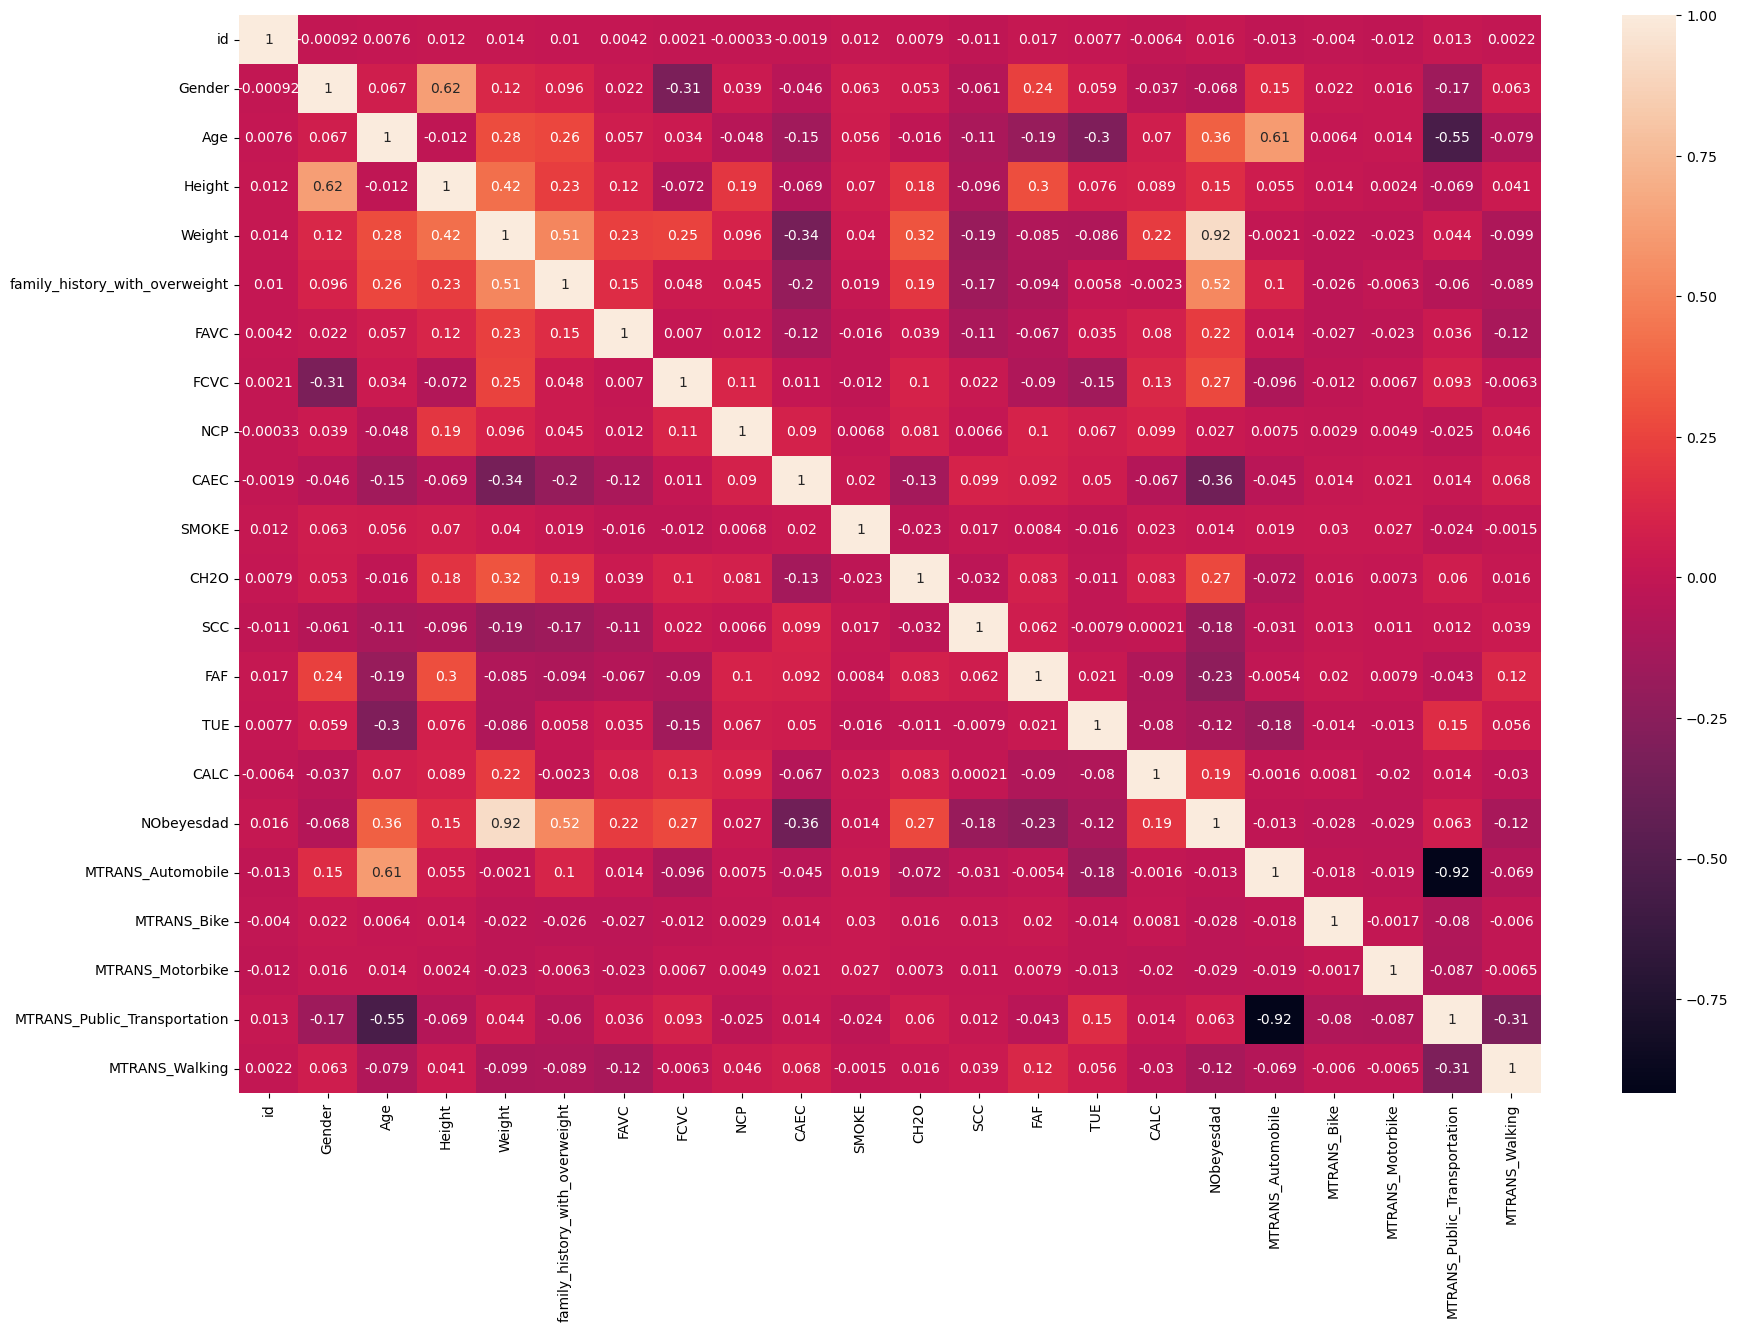

In [137]:
plt.figure(figsize=(21, 14))
sns.heatmap(train.select_dtypes('number').corr(), annot=True)

In [138]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.03)
train_selected = selector.fit_transform(train)
new_columns = selector.get_support(indices=True)
train_reduced = train.iloc[:, new_columns]
train_reduced.columns

/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Index(['id', 'Gender', 'Age', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'NObeyesdad', 'MTRANS_Automobile', 'MTRANS_Public_Transportation'],
      dtype='object')

With the Variance Threshold with threshold value equal to 0.03, we drop the following columns:
* Height
* SMOKE
* MTRANS_Bike
* MTRANS_Motorbike
* MTRANS_Walking

Apply all the changes made on train dataset to the test set

In [139]:
test.drop(columns=["Height", "SMOKE"], inplace=True)

test['Gender'] = test['Gender'].replace({'Male': 1.0, 'Female': 0.0})
test['family_history_with_overweight'] = test['family_history_with_overweight'].replace({'yes': 1.0, 'no': 0.0})
test['FAVC'] = test['FAVC'].replace({'yes': 1.0, 'no': 0.0})
test['SCC'] = test['SCC'].replace({'yes': 1.0, 'no': 0.0})

# ordinal enconding
cats = [caec, calc]
ordinal_encoder = OrdinalEncoder(categories=cats)
test_cat = test[["CAEC", "CALC"]]
test_cat_encoded = ordinal_encoder.fit_transform(test_cat)
df_encoded = pd.DataFrame(test_cat_encoded, columns=["CAEC", "CALC"])
test["CAEC"] = df_encoded["CAEC"]
test["CALC"] = df_encoded["CALC"]

# one hot enconding
test_1hot = one_hot.fit_transform(test[["MTRANS"]])
columns = one_hot.get_feature_names_out()
test = pd.concat([test, pd.DataFrame.sparse.from_spmatrix(test_1hot, columns=columns)], axis=1)
test.drop(columns=["MTRANS", "MTRANS_Bike", "MTRANS_Motorbike", "MTRANS_Walking"], inplace=True)

In [140]:
train_reduced.head(5)

id  Gender        Age      Weight  family_history_with_overweight  FAVC   
0   0     1.0  24.443011   81.669950                             1.0   1.0  \
1   1     0.0  18.000000   57.000000                             1.0   1.0   
2   2     0.0  18.000000   50.165754                             1.0   1.0   
3   3     0.0  20.952737  131.274851                             1.0   1.0   
4   4     1.0  31.641081   93.798055                             1.0   1.0   

       FCVC       NCP  CAEC      CH2O  SCC       FAF       TUE  CALC   
0  2.000000  2.983297   1.0  2.763573  0.0  0.000000  0.976473   1.0  \
1  2.000000  3.000000   2.0  2.000000  0.0  1.000000  1.000000   0.0   
2  1.880534  1.411685   1.0  1.910378  0.0  0.866045  1.673584   0.0   
3  3.000000  3.000000   1.0  1.674061  0.0  1.467863  0.780199   1.0   
4  2.679664  1.971472   1.0  1.979848  0.0  1.967973  0.931721   1.0   

   NObeyesdad  MTRANS_Automobile  MTRANS_Public_Transportation  
0         3.0                0.0                           1.0  
1         1.0                1.0                           0.0  
2         0.0                0.0                           1.0  
3         6.0                0.0                           1.0  
4         3.0                0.0                           1.0

In [141]:
test.head(5)

id  Gender        Age      Weight  family_history_with_overweight  FAVC   
0  20758     1.0  26.899886  120.644178                             1.0   1.0  \
1  20759     0.0  21.000000   66.000000                             1.0   1.0   
2  20760     0.0  26.000000  111.600553                             1.0   1.0   
3  20761     1.0  20.979254  103.669116                             1.0   1.0   
4  20762     0.0  26.000000  104.835346                             1.0   1.0   

       FCVC       NCP  CAEC      CH2O  SCC       FAF       TUE  CALC   
0  2.938616  3.000000   1.0  2.825629  0.0  0.855400  0.000000   1.0  \
1  2.000000  1.000000   1.0  3.000000  0.0  1.000000  0.000000   1.0   
2  3.000000  3.000000   1.0  2.621877  0.0  0.000000  0.250502   1.0   
3  2.000000  2.977909   1.0  2.786417  0.0  0.094851  0.000000   1.0   
4  3.000000  3.000000   1.0  2.653531  0.0  0.000000  0.741069   1.0   

   MTRANS_Automobile  MTRANS_Public_Transportation  
0                0.0                           1.0  
1                0.0                           1.0  
2                0.0                           1.0  
3                0.0                           1.0  
4                0.0                           1.0

/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [15] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [13] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [15] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[13]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
      PC                         feature   loading  type
0    PC1                             Age  0.502164  best
1    PC2                          Weight -0.498797  best
2    PC3                          Gender -0.582758  best
3    PC4                            

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 13 Principal Components explain [99.48%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

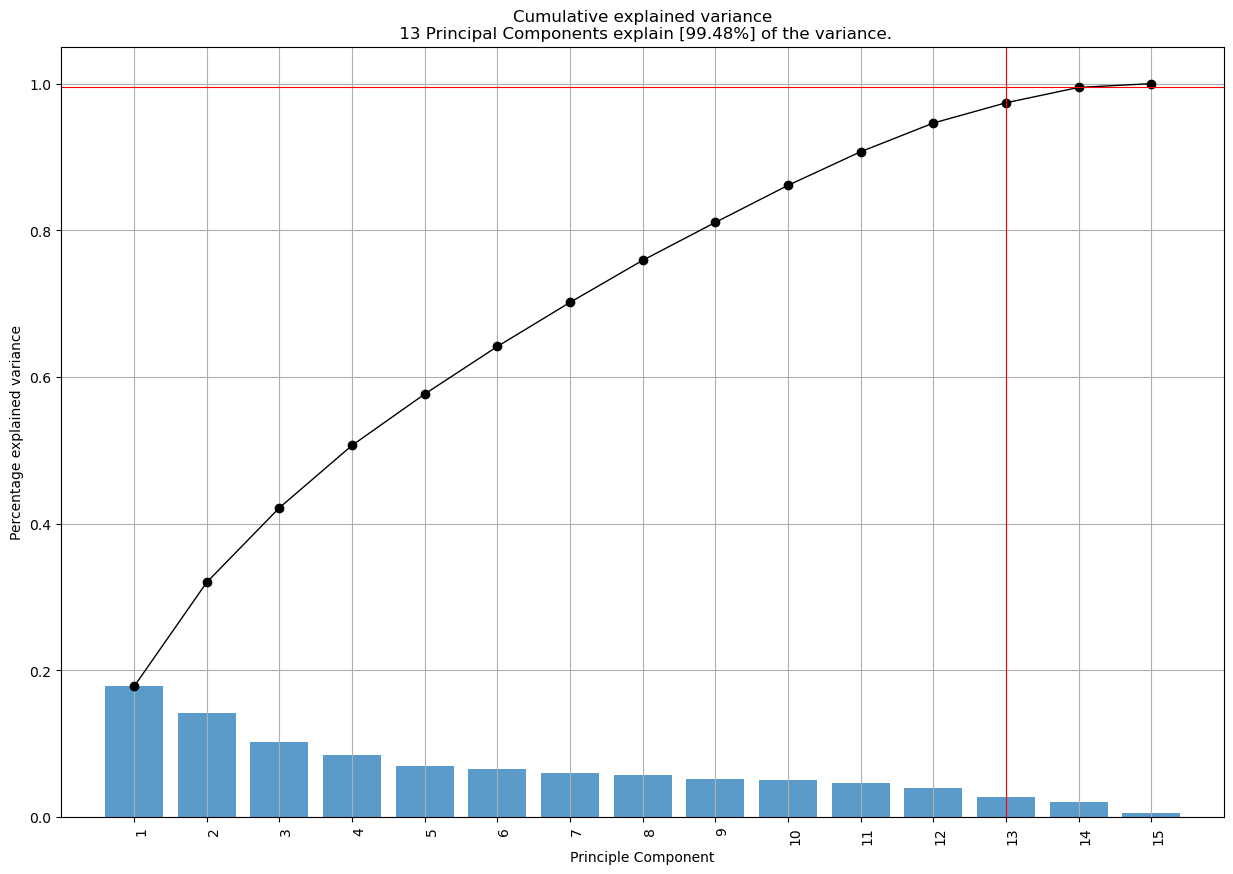

In [143]:
from pca import pca
from sklearn.preprocessing import StandardScaler

model = pca()
scaler = StandardScaler()
X_train = train_reduced.drop(columns=['id','NObeyesdad'])
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale, columns=X_train.columns)

out = model.fit_transform(X_train_scale)

print(out['topfeat'])

model.plot()

In [144]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.decomposition import PCA

In [146]:
# Modeling differents algorithms. 

random_state = 2
classifiers = []

classifiers.append(('KNeighbors', KNeighborsClassifier()))
classifiers.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
#classifiers.append(('SVC', SVC(random_state=random_state)))
#classifiers.append(('BernoulliNB', BernoulliNB()))
classifiers.append(('LogisticRegression', LogisticRegression(random_state=random_state)))
classifiers.append(('DecisionTree', DecisionTreeClassifier(random_state=random_state)))
classifiers.append(('RandomForest', RandomForestClassifier(random_state=random_state)))


X_train = train_reduced.drop(columns=['id','NObeyesdad'])
y_train = train_reduced['NObeyesdad']

param_grid = {
    'KNeighbors': {'n_neighbors': [3, 11, 13], 'weights': ['uniform', 'distance']},
    'LinearDiscriminantAnalysis': {'solver': ['svd', 'lsqr', 'eigen']},
    'SVC': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly']},
    'BernoulliNB': {'alpha': [0.1, 0.5, 1.0]},
    'LogisticRegression': {'C': [0.1, 1, 10], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
    'DecisionTree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']},
    'RandomForest': {'n_estimators': [200, 300], 'max_depth': [10, 20], 'min_samples_split': [2, 5], 'criterion': ['gini', 'entropy']}
}

results_dict = {'Classifier': [], 'Accuracy': [], 'Best Parameters': [], 'Time (s)': []}

for name, classifier in classifiers:
    # Inicie a contagem do tempo
    start_time = time.time()
    
    # Crie um GridSearchCV para o classificador atual
    grid_search = GridSearchCV(classifier, param_grid.get(name), cv=5, n_jobs=-1)
    
    # Execute o GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Obtenha o melhor modelo
    best_model = grid_search.best_estimator_
    
    # Armazene os resultados no dicionário
    results_dict['Classifier'].append(name)
    results_dict['Accuracy'].append(grid_search.best_score_)
    results_dict['Best Parameters'].append(grid_search.best_params_)
    # Calcule o tempo de execução
    elapsed_time = time.time() - start_time
    results_dict['Time (s)'].append(elapsed_time)
    
    # Imprima o desempenho médio do classificador e o tempo de execução
    print(f"{name}: Accuracy: {grid_search.best_score_:.4f}, Best Parameters: {grid_search.best_params_}, Time: {elapsed_time:.2f} s")

/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarn

KNeighbors: Accuracy: 0.8433, Best Parameters: {'n_neighbors': 11, 'weights': 'uniform'}, Time: 1.70 s


/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarn

LinearDiscriminantAnalysis: Accuracy: 0.7743, Best Parameters: {'solver': 'lsqr'}, Time: 0.24 s


/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalec

LogisticRegression: Accuracy: 0.8130, Best Parameters: {'C': 1, 'solver': 'newton-cg'}, Time: 40.34 s


/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarn

DecisionTree: Accuracy: 0.8419, Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}, Time: 1.12 s


/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarn

RandomForest: Accuracy: 0.8722, Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}, Time: 36.84 s


In [148]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the scaler
scaler = StandardScaler()

X_train = train_reduced.drop(columns=['id','NObeyesdad'])
y_train = train_reduced['NObeyesdad']

scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)


param_grid = {
    'KNeighbors': {'n_neighbors': [3, 11, 13], 'weights': ['uniform', 'distance']},
    'LinearDiscriminantAnalysis': {'solver': ['svd', 'lsqr', 'eigen']},
    'SVC': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly']},
    'BernoulliNB': {'alpha': [0.1, 0.5, 1.0]},
    'LogisticRegression': {'C': [0.1, 1, 10], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
    'DecisionTree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']},
    'RandomForest': {'n_estimators': [200, 300], 'max_depth': [10, 20], 'min_samples_split': [2, 5], 'criterion': ['gini', 'entropy']}
}

for name, classifier in classifiers:
    # Inicie a contagem do tempo
    start_time = time.time()
    
    # Crie um GridSearchCV para o classificador atual
    grid_search = GridSearchCV(classifier, param_grid.get(name), cv=5, n_jobs=-1)
    
    # Execute o GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Obtenha o melhor modelo
    best_model = grid_search.best_estimator_
    
    # Armazene os resultados no dicionário
    results_dict['Classifier'].append(name + "_Feature_Scaling")
    results_dict['Accuracy'].append(grid_search.best_score_)
    results_dict['Best Parameters'].append(grid_search.best_params_)
    # Calcule o tempo de execução
    elapsed_time = time.time() - start_time
    results_dict['Time (s)'].append(elapsed_time)
    
    # Imprima o desempenho médio do classificador e o tempo de execução
    print(f"{name}: Accuracy: {grid_search.best_score_:.4f}, Best Parameters: {grid_search.best_params_}, Time: {elapsed_time:.2f} s")

/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarn

KNeighbors: Accuracy: 0.8433, Best Parameters: {'n_neighbors': 11, 'weights': 'uniform'}, Time: 0.49 s


/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarn

LinearDiscriminantAnalysis: Accuracy: 0.7743, Best Parameters: {'solver': 'lsqr'}, Time: 0.24 s


/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of 

LogisticRegression: Accuracy: 0.8130, Best Parameters: {'C': 1, 'solver': 'newton-cg'}, Time: 42.03 s


/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarn

DecisionTree: Accuracy: 0.8419, Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}, Time: 1.01 s


/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/casalecchi/miniforge3/envs/bmt-env/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarn

RandomForest: Accuracy: 0.8722, Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}, Time: 37.66 s


In [149]:
df = pd.DataFrame(results_dict)
df

Classifier  Accuracy   
0                                  KNeighbors  0.843338  \
1                  LinearDiscriminantAnalysis  0.774304   
2                          LogisticRegression  0.813036   
3                                DecisionTree  0.841892   
4                                RandomForest  0.872242   
5                  KNeighbors_Feature_Scaling  0.843338   
6  LinearDiscriminantAnalysis_Feature_Scaling  0.774304   
7          LogisticRegression_Feature_Scaling  0.813036   
8                DecisionTree_Feature_Scaling  0.841892   
9                RandomForest_Feature_Scaling  0.872242   

                                     Best Parameters   Time (s)  
0          {'n_neighbors': 11, 'weights': 'uniform'}   1.699386  
1                                 {'solver': 'lsqr'}   0.242345  
2                    {'C': 1, 'solver': 'newton-cg'}  40.336129  
3  {'criterion': 'entropy', 'max_depth': 10, 'min...   1.123937  
4  {'criterion': 'gini', 'max_depth': 20, 'min_sa...  36.840313  
5          {'n_neighbors': 11, 'weights': 'uniform'}   0.487859  
6                                 {'solver': 'lsqr'}   0.243353  
7                    {'C': 1, 'solver': 'newton-cg'}  42.033141  
8  {'criterion': 'entropy', 'max_depth': 10, 'min...   1.009998  
9  {'criterion': 'gini', 'max_depth': 20, 'min_sa...  37.661885